## 🔧 Google Colab Setup
Mount Google Drive and set working directory so relative paths work.

In [ ]:
from google.colab import drive
# Mount Google Drive for file access
drive.mount('/content/drive')

import os
# Set the working directory to the project notebook folder
os.chdir('/content/drive/MyDrive/python-data-analysis-bootcamp/notebooks')

# Display the current working directory
os.getcwd()


Mounted at /content/drive


'/content/drive/MyDrive/python-data-analysis-bootcamp/notebooks'

# Student Data Analysis with Pandas
This notebook explores a student performance dataset using Python.

## 1. Load the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the student dataset
df = pd.read_csv('../data/student.csv')

# Display the first five rows
df.head()

,id,name,class,mark,gender
0,1,John Deo,Four,75,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


## 2. Basic exploration

In [ ]:
# Display dataset structure and column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      35 non-null     int64 
 1   name    34 non-null     object
 2   class   34 non-null     object
 3   mark    35 non-null     int64 
 4   gender  33 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [ ]:
# Summary statistics for numerical columns
df.describe()

,id,mark
count,35.000000,35.000000
mean,18.000000,74.657143
std,10.246951,16.401117
min,1.000000,18.000000
25%,9.500000,62.500000
50%,18.000000,79.000000
75%,26.500000,88.000000
max,35.000000,96.000000


## 3. Indexing and slicing

In [ ]:
# Select the 'name' column
df['name']

,name
0,John Deo
1,Max Ruin
2,Arnold
3,Krish Star
4,John Mike
5,Alex John
6,My John Rob
7,Asruid
8,Tes Qry
9,Big John


In [ ]:
# Select the 'name' and 'mark' columns
df[['name', 'mark']]

,name,mark
0,John Deo,75
1,Max Ruin,85
2,Arnold,55
3,Krish Star,60
4,John Mike,60
5,Alex John,55
6,My John Rob,78
7,Asruid,85
8,Tes Qry,78
9,Big John,55


In [ ]:
# Display the first three rows
df.head(3)

,id,name,class,mark,gender
0,1,John Deo,Four,75,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male


In [ ]:
# Select rows where the class is 'Four'
df[df['class'] == 'Four']

,id,name,class,mark,gender
0,1,John Deo,Four,75,female
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female
5,6,Alex John,Four,55,male
9,10,Big John,Four,55,female
15,16,Gimmy,Four,88,male
20,21,Babby John,Four,69,female
30,31,Marry Toeey,Four,88,male


## 4. Data manipulation

In [ ]:
# Create a boolean column indicating whether the student passed
df['passed'] = df['mark'] >= 60

# Rename the 'mark' column to 'score'
df.rename(columns={'mark': 'score'}, inplace=True)

# Remove the temporary 'passed' column
df.drop(columns=['passed'], inplace=True)

# Display the updated dataframe
df.head()

,id,name,class,score,gender
0,1,John Deo,Four,75,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


## 5. Aggregation and grouping

In [ ]:
# Calculate the average score for each class
df.groupby('class')['score'].mean()

,score
class,
Eight,79.000000
Fifth,78.000000
Five,80.000000
Four,68.750000
Nine,41.500000
Seven,77.600000
Six,82.571429
Three,73.666667


In [ ]:
# Count the number of students in each class
df['class'].value_counts()

,count
class,
Seven,10
Four,8
Six,7
Three,3
Nine,2
Five,2
Fifth,1
Eight,1


In [ ]:
# Calculate the average score for each gender
df.groupby('gender')['score'].mean()

,score
gender,
female,77.312500
male,71.588235


## 6. Pivot table and grade assignment

In [ ]:
# Create a pivot table showing average score by class and gender
df.pivot_table(values='score', index='class', columns='gender')

gender,female,male
class,,
Eight,NaN,79.0
Fifth,NaN,78.0
Five,NaN,80.0
Four,63.8,77.0
Nine,65.0,18.0
Seven,81.4,73.8
Six,89.2,54.0
Three,NaN,70.0


In [ ]:
# Assign a grade based on score ranges
df['grade'] = pd.cut(
    df['score'],
    bins=[0, 59, 69, 84, 100],
    labels=['D', 'C', 'B', 'A']
)

# Display the updated dataframe
df.head()


,id,name,class,score,gender,grade
0,1,John Deo,Four,75,female,B
1,2,Max Ruin,Three,85,male,A
2,3,Arnold,Three,55,male,D
3,4,Krish Star,Four,60,female,C
4,5,John Mike,Four,60,female,C


## 7. Sorting and exporting

In [ ]:
# Sort the dataframe by score in descending order
df_sorted = df.sort_values(by='score', ascending=False)

# Display the top rows of the sorted dataframe
df_sorted.head()

,id,name,class,score,gender,grade
32,33,Kenn Rein,Six,96,female,A
11,12,Recky,Six,94,female,A
31,32,Binn Rott,Seven,90,female,A
10,11,Ronald,Six,89,female,A
30,31,Marry Toeey,Four,88,male,A


In [ ]:
# Export the dataframe with grades to a CSV file
df.to_csv('../data/student_with_grade.csv', index=False)

## 8. Visualisation

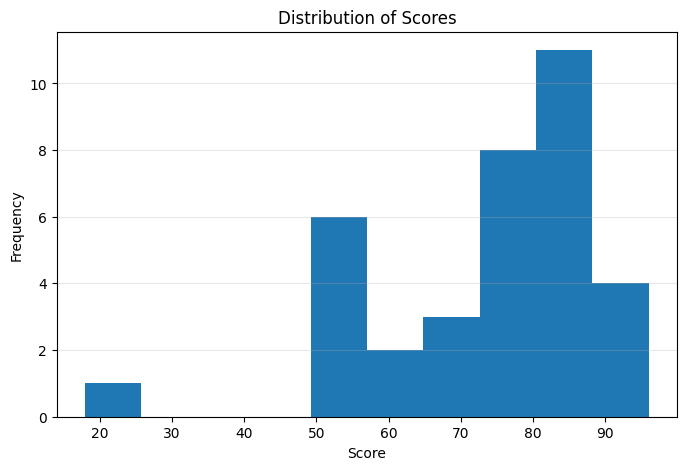

In [ ]:
# Plot a histogram showing the distribution of student scores
plt.figure(figsize=(8, 5))
df['score'].plot(kind='hist', bins=10)

# Add axis labels and a title
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')

# Add gridlines for readability
plt.grid(axis='y', alpha=0.3)

plt.show()


### 📊 Insight: Score Distribution
The scores are right‑skewed, with most students between 75–85. This suggests a moderate difficulty level and generally solid performance.

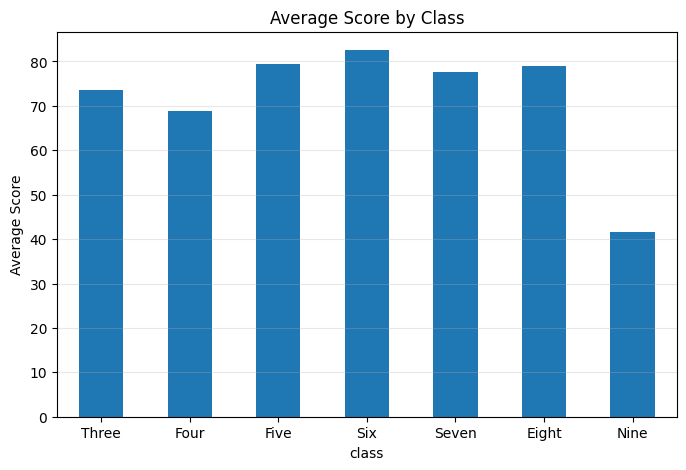

In [28]:

# Fix inconsistent class labels (might be already fixed)
df['class'] = df['class'].replace({'Fifth': 'Five'})

# Define the correct numerical class order based on the dataset
class_order = ['Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

# Convert 'class' to an ordered categorical type
df['class'] = pd.Categorical(df['class'], categories=class_order, ordered=True)

# Plot the average score for each class in numerical order
plt.figure(figsize=(8, 5))

# Group by class
df.groupby('class', observed=True)['score'].mean().plot(kind='bar')

# Add labels and title
plt.ylabel('Average Score')
plt.title('Average Score by Class')

# Keep x-labels horizontal
plt.xticks(rotation=0)

# Add gridlines
plt.grid(axis='y', alpha=0.3)

plt.show()


### 📘 Insight: Class Performance Gaps
Class Six leads in average scores while Class Nine lags greatly behind, indicating differences in teaching quality or class composition.

In [ ]:
df['class'].unique()


array(['Four', 'Three', 'Fifth', 'Five', 'Six', 'Seven', nan, 'Nine',
       'Eight'], dtype=object)

## 9. Conclusions
Summary of findings from student performance data.